# **Preprocess Data and Create Labels and Features**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.utils import to_categorical
import numpy as np
import os
import cv2 as cv
import mediapipe as mp
from matplotlib import pyplot as plt
from mediapipe.python.solutions.pose import PoseLandmark

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_multilabel_classification
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [13]:
DATA_PATH = os.path.join('My_Datasets')

actions = np.array(["maaf", "tolong", "nama", "saya", "siapa", "rumah", "start", "standby", "delete", "translate", "dimana"])

no_sequences = 30

sequence_length = 30

In [14]:

label_map = {label:num for num, label in enumerate(actions)}
label_map

sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}-norm.npy".format(frame_num)))
            
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

np.array(sequences).shape

(330, 30, 108)

In [15]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(231, 30, 108)
(99, 30, 108)
(231, 11)
(99, 11)


# **Build and Train LSTM Neural Network**

In [16]:
checkpoint = ModelCheckpoint('test.h5', monitor='categorical_accuracy', verbose=1, mode = 'max', save_best_only=True, save_weights_only=False,save_freq='epoch')

In [17]:
# model = Sequential()

# model.add(TimeDistributed(Dense(units=64, activation='tanh'), input_shape=(30, 108)))
# model.add(LSTM(64, return_sequences=True, activation='tanh'))
# model.add(Dropout(0.5))
# model.add(LSTM(32, return_sequences=False, activation='tanh'))
# model.add(Dropout(0.5))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(actions.shape[0], activation='softmax'))

# model.summary()

model = Sequential()

model.add(TimeDistributed(Dense(units=256, activation='tanh'), input_shape=(30, 108)))
model.add(LSTM(256, return_sequences=True, activation='tanh'))
model.add(Dropout(0.5))
model.add(LSTM(128, return_sequences=False, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(actions.shape[0], activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_1 (TimeDi  (None, 30, 256)           27904     
 stributed)                                                      
                                                                 
 lstm_2 (LSTM)               (None, 30, 256)           525312    
                                                                 
 dropout_3 (Dropout)         (None, 30, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                      

In [212]:
# model = Sequential()

# model.add(TimeDistributed(Dense(units=256, activation='tanh'), input_shape=(30, 108)))
# model.add(LSTM(128, return_sequences=False, activation='tanh', input_shape=(30,108)))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(actions.shape[0], activation='softmax'))

In [213]:
# COMPLEX MODEL -> EXPERIMENTAL
# model = Sequential()

# model.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(30,108)))
# model.add(LSTM(64, return_sequences=True, activation='tanh'))
# model.add(LSTM(32, return_sequences=False, activation='tanh'))
# model.add(Dropout(0.4))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))

In [214]:
# COMPLEX MODEL 2

# model = Sequential()

# model.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(30,108)))
# model.add(LSTM(64, return_sequences=True, activation='tanh'))
# model.add(LSTM(32, return_sequences=False, activation='tanh'))
# model.add(Dropout(0.5))
# model.add(Dense(actions.shape[0], activation='softmax'))

Epoch 1/20
7/8 [=========================>....] - ETA: 0s - loss: 1.9992 - categorical_accuracy: 0.3259
Epoch 1: categorical_accuracy improved from -inf to 0.32468, saving model to test.h5
8/8 [==============================] - 4s 204ms/step - loss: 1.9909 - categorical_accuracy: 0.3247 - val_loss: 1.4592 - val_categorical_accuracy: 0.5354
Epoch 2/20
2/8 [======>.......................] - ETA: 0s - loss: 1.4993 - categorical_accuracy: 0.5469

c:\Users\krisn\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/8 [=========================>....] - ETA: 0s - loss: 1.3015 - categorical_accuracy: 0.6116
Epoch 2: categorical_accuracy improved from 0.32468 to 0.61039, saving model to test.h5
8/8 [==============================] - 1s 109ms/step - loss: 1.3086 - categorical_accuracy: 0.6104 - val_loss: 0.9298 - val_categorical_accuracy: 0.7172
Epoch 3/20
7/8 [=========================>....] - ETA: 0s - loss: 0.8491 - categorical_accuracy: 0.7411
Epoch 3: categorical_accuracy improved from 0.61039 to 0.74459, saving model to test.h5
8/8 [==============================] - 1s 110ms/step - loss: 0.8434 - categorical_accuracy: 0.7446 - val_loss: 0.7081 - val_categorical_accuracy: 0.7374
Epoch 4/20
7/8 [=========================>....] - ETA: 0s - loss: 0.6153 - categorical_accuracy: 0.7902
Epoch 4: categorical_accuracy improved from 0.74459 to 0.79654, saving model to test.h5
8/8 [==============================] - 1s 106ms/step - loss: 0.6062 - categorical_accuracy: 0.7965 - val_loss: 0.4554 - val_categ

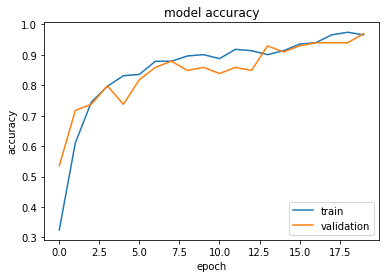

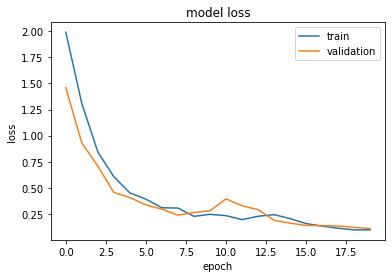

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_1 (TimeDi  (None, 30, 256)           27904     
 stributed)                                                      
                                                                 
 lstm_2 (LSTM)               (None, 30, 256)           525312    
                                                                 
 dropout_3 (Dropout)         (None, 30, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                      

In [18]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
train_model = model.fit(X_train, y_train, epochs=20, callbacks=[checkpoint], validation_data=(X_test, y_test))

plt.plot(train_model.history['categorical_accuracy'])
plt.plot(train_model.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
    
model.summary()

In [ ]:
# plot_model(model, to_file="model1.png", show_shapes=True)

# **Save Weights**

In [23]:
number_of_classes = len(actions)
current_date = '25032024' # changes manually
version = 1

model_filename ="model_" +  str(number_of_classes) + '_' + 'lstm' + '_' + current_date + '_' + str(version) + ".h5"

print(model_filename)

model.save(model_filename)

model_11_lstm_25032024_1.h5


# **Evaluation using Confusion Matrix and Accuracy**

In [52]:
yhat = model.predict(X_test)

3/3 [==============================] - 1s 11ms/step


In [53]:
print(actions[np.argmax(yhat[2])])
print(actions[np.argmax(y_test[2])])

start
start


In [54]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
from sklearn.metrics import classification_report

# Assuming ytrue and yhat are the true and predicted labels, respectively
report = classification_report(ytrue, yhat, target_names=actions)
print(report)

In [55]:
# mcm = multilabel_confusion_matrix(ytrue, yhat)
# print(mcm)

[[[79  0]
  [ 0 11]]

 [[82  0]
  [ 0  8]]

 [[78  0]
  [ 0 12]]

 [[78  0]
  [ 0 12]]

 [[85  0]
  [ 0  5]]

 [[80  2]
  [ 0  8]]

 [[82  0]
  [ 2  6]]

 [[76  0]
  [ 0 14]]

 [[86  0]
  [ 0  4]]

 [[82  0]
  [ 0  8]]]


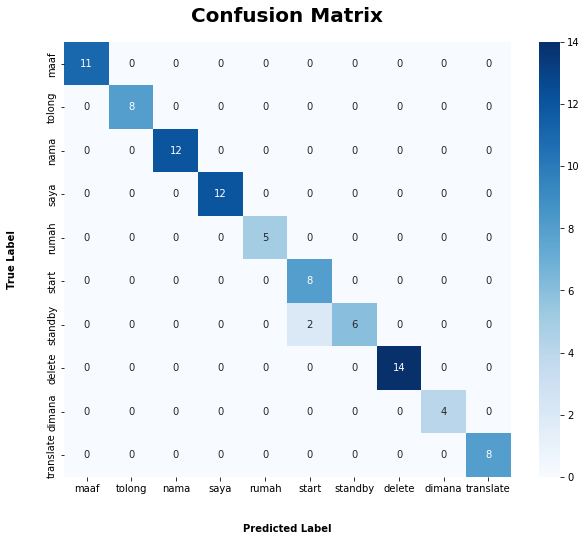

In [56]:
ytrue = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(ytrue, yhat)

plt.figure(figsize=(10, 8))
heatMap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions)

heatMap.set_xlabel('Predicted Label', labelpad=30, weight='bold')
heatMap.set_ylabel('True Label', labelpad=30, weight='bold')

heatMap.set_title('Confusion Matrix', pad=20, weight='bold', fontsize=20)
plt.show()

In [32]:
from sklearn.metrics import precision_recall_fscore_support

# Assuming ytrue and yhat are the true and predicted labels, respectively
metrics = precision_recall_fscore_support(ytrue, yhat)

precision_per_class = metrics[0]
recall_per_class = metrics[1]
f1_score_per_class = metrics[2]

# Print metrics for each class
for i, class_name in enumerate(actions):
    print(f"Class: {class_name}")
    print(f"Precision: {precision_per_class[i]}")
    print(f"Recall: {recall_per_class[i]}")
    print(f"F1 Score: {f1_score_per_class[i]}\n")

# For accuracy per class, you would need to calculate it manually:
accuracy_per_class = [(conf_matrix[i, i] / np.sum(conf_matrix[:, i])) for i in range(len(actions))]

for i, class_name in enumerate(actions):
    print(f"Class: {class_name}")
    print(f"Accuracy: {accuracy_per_class[i]}\n")

Class: maaf
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class: tolong
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class: nama
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class: saya
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class: rumah
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class: start
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class: standby
Precision: 1.0
Recall: 0.75
F1 Score: 0.8571428571428571

Class: delete
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class: dimana
Precision: 0.6666666666666666
Recall: 1.0
F1 Score: 0.8

Class: translate
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class: maaf
Accuracy: 1.0

Class: tolong
Accuracy: 1.0

Class: nama
Accuracy: 1.0

Class: saya
Accuracy: 1.0

Class: rumah
Accuracy: 1.0

Class: start
Accuracy: 1.0

Class: standby
Accuracy: 1.0

Class: delete
Accuracy: 1.0

Class: dimana
Accuracy: 0.6666666666666666

Class: translate
Accuracy: 1.0

